In [2]:
from qiskit.tools.jupyter import *
%qiskit_version_table

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Grover's-Algorithm" data-toc-modified-id="Grover's-Algorithm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Grover's Algorithm</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#Running-on-IBMQ" data-toc-modified-id="Running-on-IBMQ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Running on IBMQ</a></span></li></ul></li></ul></div>

# Grover's Algorithm

Here I will follow the [Qiskit Book](https://qiskit.org/textbook/ch-algorithms/grover.html) and we will focus on the implementation for $N=4$, but the algorithm implementation is not hard to scale up for any $N$.

The first part of the algorithm is to build an oracle that marks the desired state, let's consider the marked up state $\left| 11 \right>$.

Therefore, we need that the oracle acts as follows:

\begin{equation}
    O \left|s \right> = O \ \frac{1}{2} \ \bigg( \left| 00 \right> + \left| 01 \right> + \left| 10 \right> + \left| 11 \right> \bigg) = \frac{1}{2} \ \bigg( \left| 00 \right> + \left| 01 \right> + \left| 10 \right> - \left| 11 \right> \bigg)
\end{equation}

This is the same as a controled Z gate, that means if your first qubit is $\left| 1 \right>$, then you apply an Z operator on the seccond qubit:

\begin{equation}
    \mathrm{CZ} = \left| 0 \right> \left< 0 \right| \otimes 1 + \left| 1 \right> \left< 1 \right| \otimes Z
\end{equation}



This can be done by the reflection: $D = 2 \left| s \right> \left< s \right| - 1$. 

It can be shown that: $D = H^{2\otimes}D'H^{2\otimes}$, where:

\begin{equation}
    D' = \begin{pmatrix}
    1 &  0  & 0 & 0 \\
    0 & -1  & 0 & 0 \\
    0 &  0 & -1 & 0 \\
    0 &  0 & 0 & -1
    \end{pmatrix}
\end{equation}

Therefore:

\begin{equation}
    D' \left|s\right> = \frac{1}{2} \ \bigg( \left|00\right> - \left|01\right> - \left|10\right> - \left|11\right> \bigg)
\end{equation}

We know that the state $\left| 00 \right>$ is the only one that changes the sign and we also know that we can change the sign of $\left| 11 \right>$ by an CZ gate. The other signs can be changed using Z gates on each qubit, because $Z \left| i\right> = (-1)^i \left|i \right>$.

In [1]:
%matplotlib inline
import qiskit as Qsk
import numpy as np
import matplotlib.pyplot as plt

## Circuit

In [24]:
Q_Reg = Qsk.QuantumRegister(2)
C_Reg = Qsk.ClassicalRegister(2)
Q_Circuit = Qsk.QuantumCircuit(Q_Reg,C_Reg)

In [25]:
#Grover

Q_Circuit.h(Q_Reg);
Q_Circuit.cz(Q_Reg[0],Q_Reg[1]);
Q_Circuit.h(Q_Reg);
Q_Circuit.z(Q_Reg);
Q_Circuit.cz(Q_Reg[0],Q_Reg[1]);
Q_Circuit.h(Q_Reg);

#Measurement

Q_Circuit.barrier(Q_Reg);
Q_Circuit.measure(Q_Reg,C_Reg);

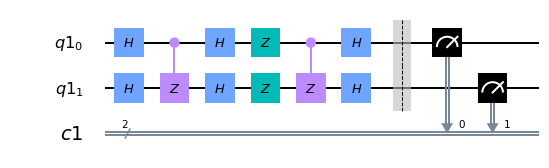

In [26]:
Q_Circuit.draw(output='mpl')

## Simulation

In [28]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(Q_Circuit, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(Q_Circuit)
print(counts)

{'11': 1024}


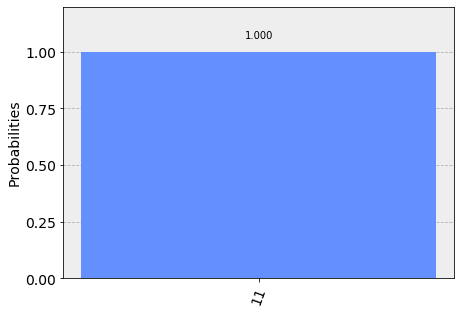

In [29]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Running on IBMQ

In [30]:
from qiskit import IBMQ

IBMQ.load_account();
provider = IBMQ.get_provider(group='open')

In [31]:
from Q_Functions import Print_status

Print_status()

 NAME : ibmq_qasm_simulator
 STATUS:
    backend_name    = ibmq_qasm_simulator
    backend_version = 0.1.547
    status_msg      = active
    pending_jobs    = 0
    operational     = True
 NAME : ibmqx2
 STATUS:
    backend_name    = ibmqx2
    backend_version = 2.0.2
    status_msg      = active
    pending_jobs    = 9
    operational     = True
 NAME : ibmq_16_melbourne
 STATUS:
    backend_name    = ibmq_16_melbourne
    backend_version = 2.0.1
    status_msg      = active
    pending_jobs    = 0
    operational     = True
 NAME : ibmq_vigo
 STATUS:
    backend_name    = ibmq_vigo
    backend_version = 1.0.2
    status_msg      = active
    pending_jobs    = 40
    operational     = True
 NAME : ibmq_ourense
 STATUS:
    backend_name    = ibmq_ourense
    backend_version = 1.0.1
    status_msg      = active
    pending_jobs    = 16
    operational     = True
 NAME : ibmq_london
 STATUS:
    backend_name    = ibmq_london
    backend_version = 1.0.0
    status_msg      = active
    p

Choosing the least busy backend

In [32]:
backend = provider.get_backend('ibmq_16_melbourne')

Submiting the job for the IBM Q platform

In [34]:
from qiskit.tools.monitor import job_monitor

job_exp = Qsk.execute(Q_Circuit, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [3]:
result_exp = job_exp.result()

NameError: name 'job_exp' is not defined

In [ ]:
from qiskit.visualization import plot_histogram
counts_exp = result_exp.get_counts(Q_Circuit)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [ ]:
job_id = job_exp.job_id()

print('JOB ID: {}'.format(job_id))